# Advanced Lane Finding

## Extracting images for camera calibration

In [1]:
%matplotlib inline
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

images_list=glob.glob('./camera_cal/calibration*.jpg')

obj_pts = [] #3-D points in the real world space
img_pts = [] #2-D points on the image plane

objp = np.zeros((9*6,3),np.float32)
objp[:,:2] =np.mgrid[0:9,0:6].T.reshape(-1,2)

for image in images_list:
    img = mpimg.imread(image)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    
    ret,corners = cv2.findChessboardCorners(gray,(9,6),None)
    
    if ret==True:
        img_pts.append(corners)
        obj_pts.append(objp)
        
        img = cv2.drawChessboardCorners(img,(9,6),corners,ret)

### Undistort images

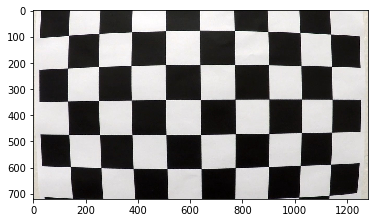

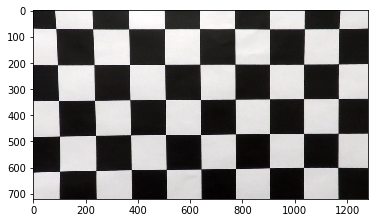

In [2]:
test_img = mpimg.imread('./camera_cal/calibration1.jpg')
gray = cv2.cvtColor(test_img,cv2.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(test_img)
ret,mtx,dist,rvecs,tvecs=cv2.calibrateCamera(obj_pts,img_pts,gray.shape[::-1],None,None)
undistort = cv2.undistort(test_img,mtx,dist,None,mtx)
plt.figure()
plt.imshow(undistort)

## Color and Gradient Thrsholding

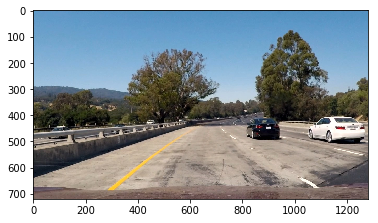

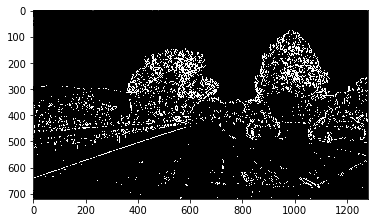

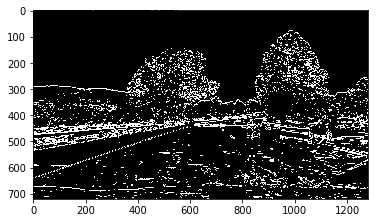

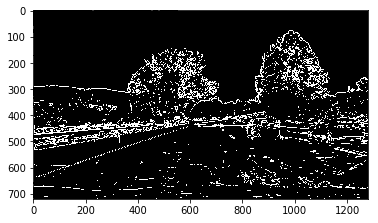

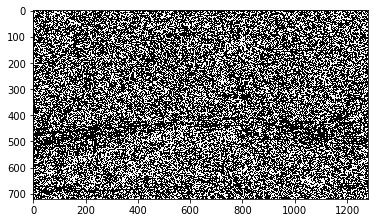

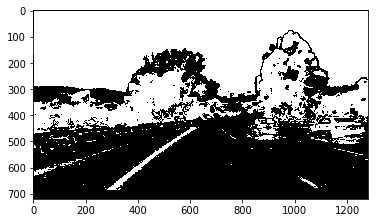

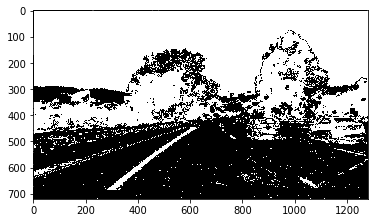

In [3]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        sobel = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    else:
        sobel = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_out = np.zeros_like(scaled_sobel)
    binary_out[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return binary_out

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    grad_mag = np.sqrt((sobelx**2) + (sobely**2))
    scaled_gradmag = np.uint8(255*grad_mag/np.max(grad_mag))
    binary_out = np.zeros_like(scaled_gradmag)
    binary_out[(scaled_gradmag >= mag_thresh[0]) & (scaled_gradmag <= mag_thresh[1])] = 1
    return binary_out

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely=cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    abs_sobelx=np.absolute(sobelx)
    abs_sobely=np.absolute(sobely)
    dir_grad=np.arctan2(abs_sobely,abs_sobelx)
    binary_out=np.zeros_like(dir_grad)
    binary_out[(dir_grad>=thresh[0]) & (dir_grad<=thresh[1])]=1
    return binary_out

def color_threshold(img,thresh=(0,255)):
    hls_img = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    h_channel = hls_img[:,:,0]
    s_channel = hls_img[:,:,2]
    binary_out = np.zeros_like(s_channel)
    binary_out[(s_channel >= thresh[0]) & (s_channel <= thresh[1])] = 1
    binary_out[(h_channel >= 20) & (h_channel <= 50)] = 1
    return binary_out

# def preprocess(image):
#     hsv_img = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
#     hsv_img[:,:,2] = cv2.equalizeHist(image[:,:,2])
#     rgb_img = cv2.cvtColor(image,cv2.COLOR_HSV2RGB)
#     return rgb_img

image = mpimg.imread('./test_images/test1.jpg')
plt.figure()
plt.imshow(image)
# Choose a Sobel kernel size
ksize = 5 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20,100))
plt.figure()
plt.imshow(gradx,cmap='gray')
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20,100))
plt.figure()
plt.imshow(grady,cmap='gray')
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30,100))
plt.figure()
plt.imshow(mag_binary,cmap='gray')
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7,1.3))
plt.figure()
plt.imshow(dir_binary,cmap='gray')
color_binary = color_threshold(image,thresh=(90,255))
plt.figure()
plt.imshow(color_binary,cmap='gray')

combined = np.zeros_like(color_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1)) | (color_binary == 1)] = 1
plt.figure()
plt.imshow(combined,cmap='gray')

In [4]:
import cv2
print(cv2.__version__)
vidcap = cv2.VideoCapture('challenge_video.mp4')
count = 0
success = True
while success:
    success,image = vidcap.read()
    print('Read a new frame: ', success)
    cv2.imwrite("./more_test_images/frame%d.jpg" % count, image)     # save frame as JPEG file
    count += 1
vidcap.release()

3.1.0
Read a new frame:  False


In [5]:
# from moviepy.editor import VideoFileClip
# video = VideoFileClip('project_video.mp4')
# # image = video.get_frame((0,4))
# image = mpimg.imread('./test_images/test5.jpg')

def preprocess(image):
#     plt.figure()
#     plt.imshow(image)

    # Choose a Sobel kernel size
    ksize = 5 # Choose a larger odd number to smooth gradient measurements

    # Apply each of the thresholding functions
    gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20,100))
#     plt.figure()
#     plt.imshow(gradx,cmap='gray')
    grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20,100))
#     plt.figure()
#     plt.imshow(grady,cmap='gray')
    mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30,100))
#     plt.figure()
#     plt.imshow(mag_binary,cmap='gray')
    dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7,1.3))
#     plt.figure()
#     plt.imshow(dir_binary,cmap='gray')
    color_binary = color_threshold(image,thresh=(90,255))
#     plt.figure()
#     plt.imshow(color_binary,cmap='gray')

    # shadow_corrected_binary = shadow_corr(image,thresh=(20,90))
    # plt.figure()
    # plt.imshow(shadow_corrected_binary,cmap='gray')

    combined = np.zeros_like(color_binary)
    combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1)) | (color_binary == 1)] = 1
#     plt.figure()
#     plt.imshow(combined,cmap='gray')

    cv2.imwrite("processed_image.jpg",image)
    
    return combined
    

## Perspective Transform of the images

In [6]:
src = np.float32([(310,670),(544,468),(725,468),(1110,670)])
dst = np.float32([(310,720),(310,0),(1110,0),(1110,720)])

def perspective_transform(combined):
    imgsize = (combined.shape[1],combined.shape[0])
    M = cv2.getPerspectiveTransform(src,dst)
    warped = cv2.warpPerspective(combined,M,imgsize)
#     plt.imshow(warped,cmap='gray')
    return warped

In [7]:
ploty = np.zeros(720)
left_fitx = np.zeros(720)
right_fitx = np.zeros(720)
left_fit = np.zeros(3)
right_fit = np.zeros(3)

def sliding_window_search(warped):
    histogram = np.sum(warped[warped.shape[0]//2:,:],axis=0)
    # plt.figure()
    # plt.plot(histogram)
    midpoint = histogram.shape[0]//2
    leftx = np.argmax(histogram[:midpoint])
    rightx = np.argmax(histogram[midpoint:])+midpoint
    # print(leftx)
    # print(rightx)
    num_windows = 9
    window_height = warped.shape[0]//num_windows
    #width of the window from the center
    margin = 100
    #minimum number of pixels for recentering the window
    minpix = 50
    #non-zero pixels in the binary warped image
    nonzero_pix = warped.nonzero()
    # print(nonzero_pix)
    nonzeroy = np.array(nonzero_pix[0])
    # print(nonzeroy)
    nonzerox = np.array(nonzero_pix[1])
    # print(nonzerox)
    #Convert into color image for visualization
    warped_rgb = np.dstack((warped,warped,warped))*255

    left_lane_inds = []
    right_lane_inds = []
    for n in range(num_windows):
        window_upper = warped.shape[0]-window_height*(n+1)
        window_lower = window_upper + window_height
        left_lane_leftx = leftx-margin
        left_lane_rightx = leftx+margin
        right_lane_leftx = rightx-margin
        right_lane_rightx = rightx+margin
        cv2.rectangle(warped_rgb,(left_lane_leftx, window_upper),(left_lane_rightx,window_lower),(0,255,0),3)
        cv2.rectangle(warped_rgb,(right_lane_leftx,window_upper),(right_lane_rightx,window_lower),(0,255,0),3)
        good_left_lane_pix = ((nonzeroy>window_upper) & (nonzeroy<=window_lower) & (nonzerox>left_lane_leftx) & (nonzerox<=left_lane_rightx)).nonzero()[0]
    #     print(((nonzeroy>window_upper) & (nonzeroy<=window_lower) & (nonzerox>left_lane_leftx) & (nonzerox<=left_lane_rightx)).nonzero())
    #     print(((nonzeroy>window_upper) & (nonzeroy<=window_lower) & (nonzerox>left_lane_leftx) & (nonzerox<=left_lane_rightx)))
        good_right_lane_pix = ((nonzeroy>window_upper) & (nonzeroy<=window_lower) & (nonzerox>right_lane_leftx) & (nonzerox<=right_lane_rightx)).nonzero()[0]
    #     print(good_right_lane_pix)
        left_lane_inds.append(good_left_lane_pix)
        right_lane_inds.append(good_right_lane_pix)

        if len(good_left_lane_pix)>minpix:
            leftx = np.int(np.mean(nonzerox[good_left_lane_pix]))
        if len(good_right_lane_pix)>minpix:
            rightx = np.int(np.mean(nonzerox[good_right_lane_pix]))

#     plt.figure()
#     plt.imshow(warped_rgb)
    
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    leftx_pts = nonzerox[left_lane_inds]
    lefty_pts = nonzeroy[left_lane_inds]
    rightx_pts = nonzerox[right_lane_inds]
    righty_pts = nonzeroy[right_lane_inds]

    left_fit = np.polyfit(lefty_pts,leftx_pts,2)
    right_fit = np.polyfit(righty_pts,rightx_pts,2)
    
    ploty = np.linspace(0,warped.shape[0]-1,warped.shape[0])
    left_fitx = left_fit[0]*(ploty**2) + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*(ploty**2) + right_fit[1]*ploty + right_fit[2]
    
    return ploty,left_fitx,right_fitx,left_fit,right_fit

In [8]:
# warped_rgb[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
# warped_rgb[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
# plt.imshow(warped_rgb)
# plt.plot(left_fitx, y_pts, color='yellow')
# plt.plot(right_fitx, y_pts, color='yellow')
# plt.xlim(0, 1280)
# plt.ylim(720, 0)

In [9]:
def search_lines(binary_warped,left_fit,right_fit):
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin))) 

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return ploty,left_fitx,right_fitx





In [10]:
# N = 12
# # Define a class to receive the characteristics of each line detection
# class Line():
#     def __init__(self):
#         # was the line detected in the last iteration?
#         self.detected = False  
#         # polynomial coefficients of the last n fits
#         self.recent_left_fitx = [] 
#         self.recent_right_fitx = []
#         # x values of the last n fits of the line
#         self.recent_left_xfitted = [] 
#         self.recent_right_xfitted = []
#         #average x values of the fitted line over the last n iterations
#         self.best_leftx = None  
#         self.best_rightx = None  
#         #polynomial coefficients averaged over the last n iterations
#         self.best_left_fit = None  
#         self.best_right_fit = None
#         #polynomial coefficients for the most recent fit
#         self.current_leftfit = [np.array([False])] 
#         self.current_rightfit = [np.array([False])] 
#         #radius of curvature of the line in some units
#         self.radius_of_curvature_ll = None 
#         self.radius_of_curvature_rl = None
#         #distance in meters of vehicle center from the line
#         self.line_base_pos = None 
#         #difference in fit coefficients between last and new fits
#         self.diffs = np.array([0,0,0], dtype='float') 
#         #x values for detected line pixels
#         self.allx = None  
#         #y values for detected line pixels
#         self.ally = None
#     def update_val(self,left_fitx,right_fitx,left_fit,right_fit):
#         self.detected = True
#         if len(self.recent_left_xfitted) == N:
#             self.recent_left_xfitted.pop(0)
#             self.recent_left_xfitted.append(left_fitx)
#             self.best_leftx = np.sum(self.recent_left_xfitted,axis=0)//N
#             self.recent_left_fitx.pop(0)
#             self.recent_left_fitx.append(left_fit)
#             self.best_left_fit = np.sum(self.recent_left_fitx,axis=0)//N
            
#         else:
#             self.recent_left_xfitted.append(left_fitx)
#             self.recent_left_fitx.append(left_fit)
            
#         if len(self.recent_right_xfitted) == N:
#             self.recent_right_xfitted.pop(0)
#             self.recent_right_xfitted.append(right_fitx)
#             self.best_rightx = np.sum(self.recent_right_xfitted,axis=0)//N
#             self.recent_right_fitx.pop(0)
#             self.recent_right_fitx.append(right_fit)
#             self.best_right_fit = np.sum(self.recent_right_fitx,axis=0)//N
#         else:
#             self.recent_right_xfitted.append(right_fitx)
#             self.recent_right_fitx.append(right_fit)

In [12]:
search = True
# best_fit = Line()
def process_image(image):
    undistort = cv2.undistort(image,mtx,dist,None,mtx)
    binary_out_img = preprocess(undistort)
    warped_img = perspective_transform(binary_out_img)
    
    global search,ploty,left_fitx,right_fitx,left_fit,right_fit
    if search == True:
        ploty,left_fitx,right_fitx,left_fit,right_fit = sliding_window_search(warped_img)
        search = False
    else:    
        ploty,left_fitx,right_fitx = search_lines(warped_img,left_fit,right_fit)
    
#     best_fit.update_val(left_fitx,right_fitx,left_fit,right_fit)
#     from IPython.core.debugger import Tracer; Tracer()()
#     if best_fit.best_leftx != None:
#         left_fitx = best_fit.best_leftx
#         right_fitx = best_fit.best_rightx
#         left_fit = best_fit.best_left_fit
#         right_fit = best_fit.best_right_fit
        
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warped_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    
    Minv = cv2.getPerspectiveTransform(dst,src)
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undistort, 1, newwarp, 0.3, 0)
#     plt.imshow(result)
    return result

In [15]:
from moviepy.editor import VideoFileClip
white_output = 'test_videos_output/LaneFinding_trial2.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
clip1 = VideoFileClip("project_video.mp4")
# clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/LaneFinding_trial2.mp4
[MoviePy] Writing video test_videos_output/LaneFinding_trial2.mp4


100%|█████████▉| 1260/1261 [06:15<00:00,  3.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/LaneFinding_trial2.mp4 

CPU times: user 14min 47s, sys: 2.65 s, total: 14min 50s
Wall time: 6min 15s
